In [ ]:
# Import and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

CLEAN_PATH = Path("../data/clean")

summary = pd.read_csv(CLEAN_PATH / "summary_clean.csv")
patient = pd.read_csv(CLEAN_PATH / "patient_clean.csv")
services = pd.read_csv(CLEAN_PATH / "services_clean.csv")

summary.head(), patient.head(), services.head()


C:\Users\lanam\AppData\Local\Temp\ipykernel_22928\1923718001.py:11: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  summary = pd.read_csv(CLEAN_PATH / "summary_clean.csv")
C:\Users\lanam\AppData\Local\Temp\ipykernel_22928\1923718001.py:12: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  patient = pd.read_csv(CLEAN_PATH / "patient_clean.csv")


(   year locationabbr    locationdesc                         facilityname  \
 0  2020           OH            Ohio    Institute for Reproductive Health   
 1  2020           OK        Oklahoma  OU Physicians Reproductive Medicine   
 2  2020           NY        New York              Strong Fertility Center   
 3  2020           CO        Colorado      Rocky Mountain Fertility Center   
 4  2020           NC  North Carolina                        UNC Fertility   
 
             city clinic_status    topic                             subtopic  \
 0     Cincinnati          Open  Summary                             Footnote   
 1  Oklahoma City          Open  Summary  Characteristics of ART Cycles (a,b)   
 2      Rochester          Open  Summary         Reason for Using ART (a,b,g)   
 3      Englewood          Open  Summary                             Footnote   
 4        Raleigh          Open  Summary            Clinic Services & Profile   
 
                                          

In [2]:
import sys
!{sys.executable} -m pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 46.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 42.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 50.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Make sure cycle_count is numeric
summary["cycle_count"] = pd.to_numeric(summary["cycle_count"], errors="coerce")

# Drop rows with no cycle_count
summary_cycles = summary.dropna(subset=["cycle_count"])

# Group by year and sum cycles
cycles_by_year = summary_cycles.groupby("year")["cycle_count"].sum().reset_index()

cycles_by_year


,year,cycle_count
0,2020,11541215.0
1,2021,51376761.0
2,2022,12497903.0


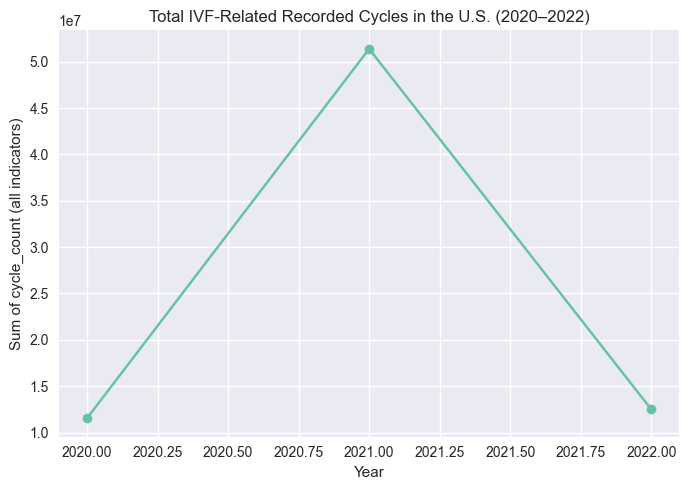

In [ ]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(cycles_by_year["year"], cycles_by_year["cycle_count"], marker="o")
plt.title("Total IVF-Related Recorded Cycles in the U.S. (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Sum of cycle_count (all indicators)")
plt.tight_layout()
plt.show()


In [ ]:
# IVF success rates by the age group
# Filter for possible age group indicators
age_success = summary[
    summary['breakout_category'].str.contains("Age", case=False, na=False)
]
age_success[['year', 'breakout_category', 'breakout', 'question']].head()


,year,breakout_category,breakout,question
1,2020,Age of Patient,<35,Percentage of cycles discontinued after retrie...
8,2020,Age of Patient,35-37,Percentage of cycles discontinued after retrie...
11,2020,Age of Patient,>40,Total number of cycles
13,2020,Age of Patient,38-40,Number of intended retrievals
14,2020,Age of Patient,>40,Percentage of transfers of at least 1 embryo w...


In [ ]:
# Search for all contains "live", "burth", "preg", "pregnancy"
success_keywords = ["live", "birth", "preg", "pregnancy"]

age_success_full = summary[
    summary["breakout_category"].str.contains("Age", case=False, na=False)
    &
    summary["question"].str.contains("|".join(success_keywords), case=False, na=False)
]

age_success_full[["year", "breakout", "question", "data_value", "data_value_num"]].head(20)


,year,breakout,question,data_value,data_value_num
47,2020,<35,Percentage of transfers resulting in singleton...,55.1,55.1
50,2020,35-37,Percentage of new patients having live-birth d...,33.3,33.3
67,2020,>40,Percentage of new patients having live-birth d...,0.0,0
121,2020,35-37,Percentage of transfers resulting in live-birt...,45.5,45.5
144,2020,35-37,Percentage of transfers resulting in live-birt...,55.0,55
149,2020,<35,Percentage of new patients having live-birth d...,68.6,68.6
278,2020,>40,Percentage of new patients having live-birth d...,7.7,7.7
390,2020,38-40,Percentage of transfers resulting in live-birt...,44.0,44
432,2020,>40,Percentage of intended retrievals resulting in...,6.9,6.9
458,2020,35-37,Percentage of retrievals resulting in singleto...,10.0,10


In [ ]:
# Extract only success rate rows
success = summary[
    summary["question"].str.contains("transfers resulting in live-birth", case=False, na=False)
    &
    summary["breakout_category"].str.contains("Age", case=False, na=False)
]

# Keep the useful columns
success = success[["year", "breakout", "data_value_num"]]

# Clean age group labels (ensure ordering)
success = success.replace({
    "<35": "<35",
    "35-37": "35–37",
    "38-40": "38–40",
    ">40": ">40"
})

success.head(20)


,year,breakout,data_value_num
121,2020,35–37,45.5
144,2020,35–37,55
390,2020,38–40,44
473,2020,38–40,49.5
542,2020,35–37,51.5
595,2020,<35,42.6
847,2020,<35,58.1
1035,2020,<35,72.4
1041,2020,>40,15
1049,2020,38–40,40.7


In [8]:
success.info()
success.head(20)


<class 'pandas.core.frame.DataFrame'>
Index: 5448 entries, 121 to 182000
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            5448 non-null   int64 
 1   breakout        5448 non-null   object
 2   data_value_num  5448 non-null   object
dtypes: int64(1), object(2)
memory usage: 170.2+ KB


,year,breakout,data_value_num
121,2020,35–37,45.5
144,2020,35–37,55
390,2020,38–40,44
473,2020,38–40,49.5
542,2020,35–37,51.5
595,2020,<35,42.6
847,2020,<35,58.1
1035,2020,<35,72.4
1041,2020,>40,15
1049,2020,38–40,40.7


In [ ]:
# Convert data_value_num to numeric
success["data_value_num"] = pd.to_numeric(success["data_value_num"], errors="coerce")


In [ ]:
# Drop any Nan values
success = success.dropna(subset=["data_value_num"])


In [ ]:
# Standardize age group lables
success["breakout"] = success["breakout"].replace({
    "35-37": "35–37",
    "38-40": "38–40",
})


In [ ]:
# Pivot table
success_pivot = success.pivot_table(
    index="year",
    columns="breakout",
    values="data_value_num",
    aggfunc="mean"
).sort_index()

success_pivot


breakout,35–37,38–40,<35,>40
year,,,,
2020,29.611308,20.643681,41.023060,6.588914
2021,28.873348,20.866740,39.988767,7.038987
2022,32.750985,24.410722,40.884464,8.724726


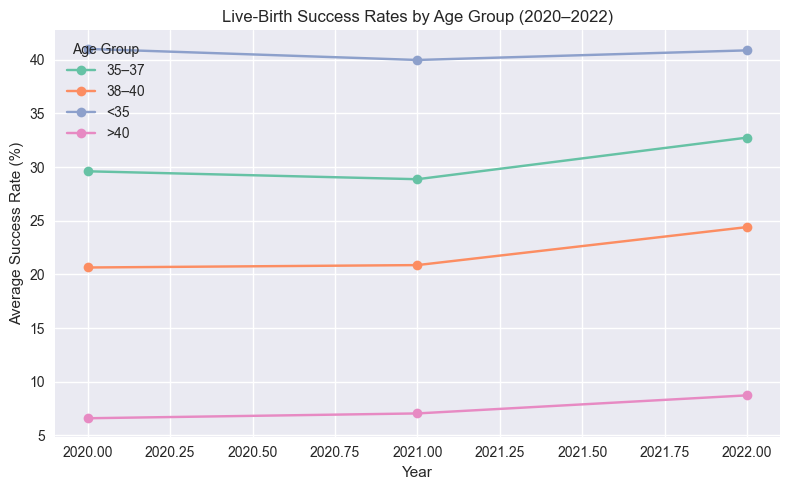

In [ ]:
# Visualization of success rate lines
plt.figure(figsize=(8,5))

for age_group in success_pivot.columns:
    plt.plot(success_pivot.index, success_pivot[age_group],
             marker="o", label=age_group)

plt.title("Live-Birth Success Rates by Age Group (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Average Success Rate (%)")
plt.legend(title="Age Group")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
success_pivot


breakout,35–37,38–40,<35,>40
year,,,,
2020,29.611308,20.643681,41.023060,6.588914
2021,28.873348,20.866740,39.988767,7.038987
2022,32.750985,24.410722,40.884464,8.724726


In [15]:
# Reset index so year is a normal column
success_long = (
    success_pivot
    .reset_index()
    .melt(id_vars="year", var_name="age_group", value_name="success_rate")
)

success_long


,year,age_group,success_rate
0,2020,35–37,29.611308
1,2021,35–37,28.873348
2,2022,35–37,32.750985
3,2020,38–40,20.643681
4,2021,38–40,20.866740
5,2022,38–40,24.410722
6,2020,<35,41.023060
7,2021,<35,39.988767
8,2022,<35,40.884464
9,2020,>40,6.588914


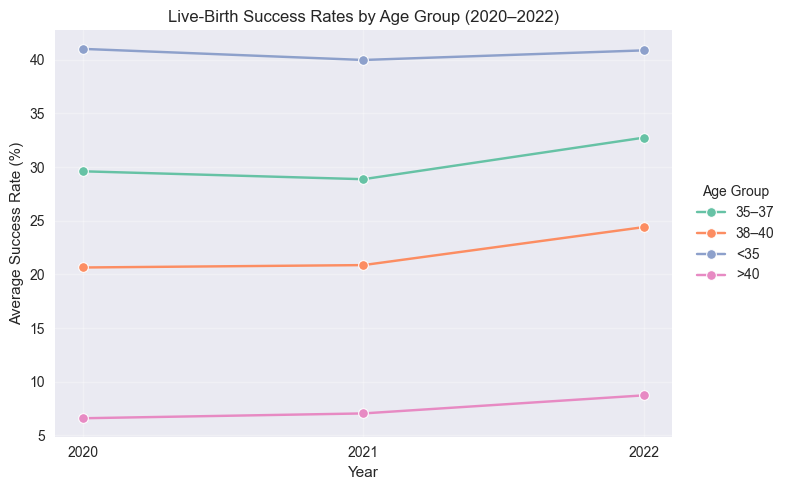

In [ ]:
#Plot the success rate line
plt.figure(figsize=(8,5))

sns.lineplot(
    data=success_long,
    x="year",
    y="success_rate",
    hue="age_group",
    marker="o"
)

plt.title("Live-Birth Success Rates by Age Group (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Average Success Rate (%)")

# Force nice integer x-ticks
plt.xticks([2020, 2021, 2022])

# Move legend out of the way
plt.legend(title="Age Group", loc="center left", bbox_to_anchor=(1.02, 0.5))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Install Plotly
import sys
!{sys.executable} -m pip install plotly


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------------------- -------------- 6.3/9.9 MB 41.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 39.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Install nbformat
import sys
!{sys.executable} -m pip install nbformat



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install plotly==5.18.0
!pip install nbformat --upgrade


   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   -------------------- ------------------- 7.9/15.6 MB 53.9 MB/s eta 0:00:01
   ---------------------------------------- 15.6/15.6 MB 46.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [7]:
CLEAN_PATH = Path("../data/clean")

summary = pd.read_csv(CLEAN_PATH / "summary_clean.csv")
patient = pd.read_csv(CLEAN_PATH / "patient_clean.csv")
services = pd.read_csv(CLEAN_PATH / "services_clean.csv")


C:\Users\lanam\AppData\Local\Temp\ipykernel_4016\770144723.py:3: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  summary = pd.read_csv(CLEAN_PATH / "summary_clean.csv")
C:\Users\lanam\AppData\Local\Temp\ipykernel_4016\770144723.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  patient = pd.read_csv(CLEAN_PATH / "patient_clean.csv")


In [8]:
summary.head()


,year,locationabbr,locationdesc,facilityname,city,clinic_status,topic,subtopic,question,breakout_category,breakout,data_value,data_value_num,cycle_count,clinicid,geolocation,year.1
0,2020,OH,Ohio,Institute for Reproductive Health,Cincinnati,Open,Summary,Footnote,Cycles evaluating new procedures,NaN,NaN,0,0,NaN,143,POINT (-84.4439587 39.148408),2020
1,2020,OK,Oklahoma,OU Physicians Reproductive Medicine,Oklahoma City,Open,Summary,"Characteristics of ART Cycles (a,b)",Percentage of cycles discontinued after retrie...,Age of Patient,<35,6.3,6.3,410,9,POINT (-97.5009249 35.4774816),2020
2,2020,NY,New York,Strong Fertility Center,Rochester,Open,Summary,"Reason for Using ART (a,b,g)",Gestational carrier,NaN,NaN,0,0,762,357,POINT (-77.6303291 43.0645425),2020
3,2020,CO,Colorado,Rocky Mountain Fertility Center,Englewood,Open,Summary,Footnote,Cycles evaluating new procedures,NaN,NaN,0,0,NaN,299,POINT (-104.841853 39.5367013),2020
4,2020,NC,North Carolina,UNC Fertility,Raleigh,Open,Summary,Clinic Services & Profile,Donor egg services,Yes/No,Yes,Yes,0,NaN,344,POINT (-78.7636599 35.9067499),2020


In [ ]:
# Agrigate clinics by state
clinics_by_state = (
    summary[["locationabbr", "facilityname"]]
    .drop_duplicates()
    .groupby("locationabbr")
    .size()
    .reset_index(name="clinic_count")
    .sort_values("clinic_count", ascending=False)
)

clinics_by_state.head()


,locationabbr,clinic_count
4,CA,93
44,TX,50
34,NY,49
14,IL,30
9,FL,29


In [ ]:
# Geographic distribution of IVF clinics over US states - map
import plotly.express as px

fig = px.choropleth(
    clinics_by_state,
    locations="locationabbr",
    locationmode="USA-states",
    color="clinic_count",
    scope="usa",
    color_continuous_scale="Viridis",
    labels={"clinic_count": "Number of IVF clinics"},
    title="IVF Clinics by U.S. State (CDC ART 2020–2022)"
)

fig.show()



In [ ]:
# Retrieval vs transfer success rates by ages
retrieval = summary[
    summary["question"].str.contains("retrieval", case=False, na=False)
    & summary["breakout_category"].str.contains("Age", case=False, na=False)
]

retrieval = retrieval[["year", "breakout", "data_value_num"]]
retrieval["data_value_num"] = pd.to_numeric(retrieval["data_value_num"], errors="coerce")
retrieval.dropna(inplace=True)

retrieval.head(10)

,year,breakout,data_value_num
1,2020,<35,6.3
8,2020,35-37,8.9
13,2020,38-40,5.0
16,2020,35-37,11.7
25,2020,<35,7.8
29,2020,<35,1.2
38,2020,35-37,28.0
44,2020,<35,11.4
50,2020,35-37,33.3
62,2020,38-40,13.3


In [ ]:
# Extract retrieval success indicators 
retrieval_pivot = retrieval.pivot_table(
    index="year",
    columns="breakout",
    values="data_value_num",
    aggfunc="mean"
).sort_index()

retrieval_pivot


breakout,35-37,38-40,<35,>40,Total
year,,,,,
2020,24.185035,19.020187,36.919740,12.573676,10.518293
2021,34.027921,28.539974,54.027091,20.643534,10.045815
2022,26.987303,22.055644,39.330831,14.528464,10.056346


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

CLEAN_PATH = Path("../data/clean")

summary = pd.read_csv(CLEAN_PATH / "summary_clean.csv")
patient = pd.read_csv(CLEAN_PATH / "patient_clean.csv")
services = pd.read_csv(CLEAN_PATH / "services_clean.csv")

summary.head(), patient.head(), services.head()


C:\Users\lanam\AppData\Local\Temp\ipykernel_4016\1923718001.py:11: DtypeWarning:

Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\lanam\AppData\Local\Temp\ipykernel_4016\1923718001.py:12: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



(   year locationabbr    locationdesc                         facilityname  \
 0  2020           OH            Ohio    Institute for Reproductive Health   
 1  2020           OK        Oklahoma  OU Physicians Reproductive Medicine   
 2  2020           NY        New York              Strong Fertility Center   
 3  2020           CO        Colorado      Rocky Mountain Fertility Center   
 4  2020           NC  North Carolina                        UNC Fertility   
 
             city clinic_status    topic                             subtopic  \
 0     Cincinnati          Open  Summary                             Footnote   
 1  Oklahoma City          Open  Summary  Characteristics of ART Cycles (a,b)   
 2      Rochester          Open  Summary         Reason for Using ART (a,b,g)   
 3      Englewood          Open  Summary                             Footnote   
 4        Raleigh          Open  Summary            Clinic Services & Profile   
 
                                          

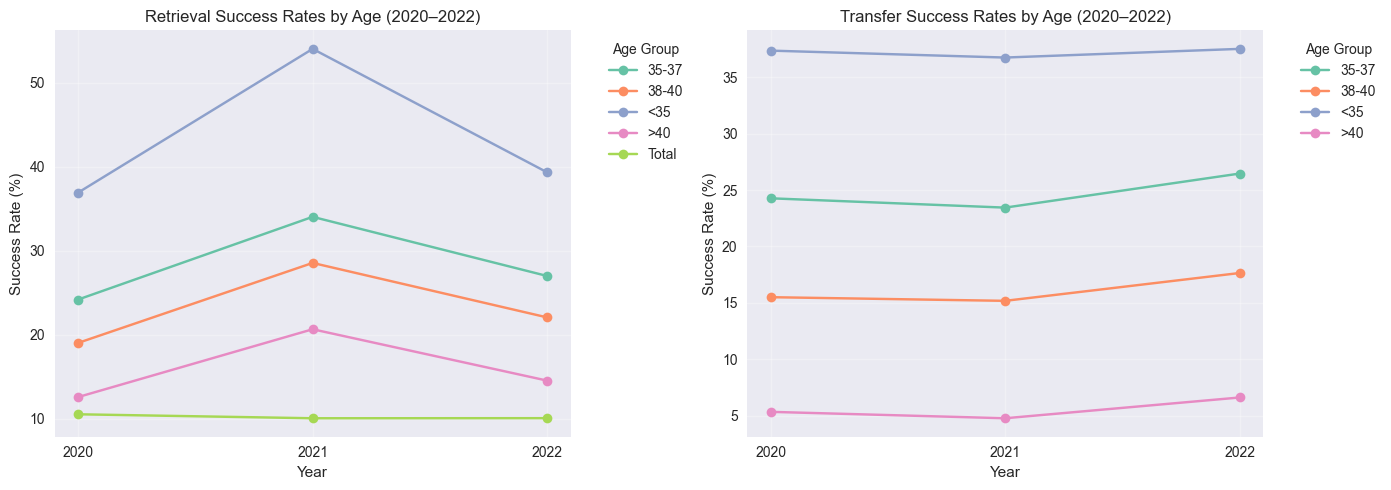

In [ ]:
# Visualization
plt.figure(figsize=(14,5))

# Retrieval Success
plt.subplot(1, 2, 1)
for age_group in retrieval_pivot.columns:
    plt.plot(retrieval_pivot.index, retrieval_pivot[age_group],
             marker="o", label=age_group)

plt.title("Retrieval Success Rates by Age (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.xticks([2020, 2021, 2022])
plt.grid(True, alpha=0.3)

# Move legend outside
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Transfer Success
plt.subplot(1, 2, 2)
for age_group in success_pivot.columns:
    plt.plot(success_pivot.index, success_pivot[age_group],
             marker="o", label=age_group)

plt.title("Transfer Success Rates by Age (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.xticks([2020, 2021, 2022])
plt.grid(True, alpha=0.3)

# Legend outside again
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

